In [ ]:
### Core Packages
import pandas as pd
import numpy as np
from scipy.special import softmax
import time

### Visualization Packages
import matplotlib.pyplot as plt

### Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import shap

### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image, generate_label

### Others
import warnings

: 

In [3]:
def print_feature_importances_shap_values(shap_values, features):
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
 
    importances_norm = softmax(importances)

    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
   
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
  
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
final_results = pd.DataFrame()

for rod in range(0, 100):

    for ticker in ['bbdc4.sa']:

        df_ticker = pd.read_csv(f'data/processed/{ticker}_processed.csv', encoding='utf8', delimiter=',')
        df_ticker['date'] = pd.to_datetime(df_ticker['date'])
        df_ticker_target = df_ticker.loc[(df_ticker['date'] >= '2015-01-01')]

        for days in [3]:

                df_train = generate_label(days, df_ticker_target)
                df_train = df_train.set_index('date')

                transfor = 'normal'
                dir_func = np.log if transfor == 'log' else lambda x:x
                inf_func = np.exp if transfor == 'log' else lambda x:x

                cols_to_transform = [col for col in df_train.columns if not 'target' in col]
                df_train[cols_to_transform] = dir_func(df_train[cols_to_transform])


                X = df_train.drop(columns = 'target')
                y = df_train['target']
                feature_names = X.columns

                st_feat = MinMaxScaler()
                X = X.sort_index(axis = 1)
                X = st_feat.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

                ### Feature Selection
                rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=2, oob_score=True, bootstrap=True, n_jobs=4)
                rf.fit(X, y)

                explainer_rf = rf.feature_importances_

                forest_importances = pd.Series(explainer_rf, index=feature_names)

                results = pd.DataFrame(explainer_rf, index = feature_names).reset_index().pivot_table(columns= 'index')
                results['Ação'] = ticker
                results['Dias'] = days
                results['Rodada'] = rod
                results = results[['Ação', 'Dias', 'Rodada'] + list(feature_names)]

                final_results = pd.concat([final_results, results])

final_results.to_excel(f'results_importance_{ticker}_{days}.xlsx', index = False)

In [66]:
final_results = pd.DataFrame()

for rod in range(0, 100):

    for ticker in ['bbdc4.sa']:

        df_ticker = pd.read_csv(f'data/processed/{ticker}_processed.csv', encoding='utf8', delimiter=',')
        df_ticker['date'] = pd.to_datetime(df_ticker['date'])
        df_ticker_target = df_ticker.loc[(df_ticker['date'] >= '2015-01-01')]

        for days in [7]:

                df_train = generate_label(days, df_ticker_target)
                df_train = df_train.set_index('date')

                transfor = 'normal'
                dir_func = np.log if transfor == 'log' else lambda x:x
                inf_func = np.exp if transfor == 'log' else lambda x:x

                cols_to_transform = [col for col in df_train.columns if not 'target' in col]
                df_train[cols_to_transform] = dir_func(df_train[cols_to_transform])


                X = df_train.drop(columns = 'target')
                y = df_train['target']
                feature_names = X.columns

                st_feat = MinMaxScaler()
                X = X.sort_index(axis = 1)
                X = st_feat.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

                ### Feature Selection
                rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=2, oob_score=True, bootstrap=True, n_jobs=4)
                rf.fit(X, y)

                explainer_rf = rf.feature_importances_

                forest_importances = pd.Series(explainer_rf, index=feature_names)

                results = pd.DataFrame(explainer_rf, index = feature_names).reset_index().pivot_table(columns= 'index')
                results['Ação'] = ticker
                results['Dias'] = days
                results['Rodada'] = rod
                results = results[['Ação', 'Dias', 'Rodada'] + list(feature_names)]

                final_results = pd.concat([final_results, results])

final_results.to_excel(f'results_importance_{ticker}_{days}.xlsx', index = False)

In [48]:
forest_importances

open                 0.041759
high                 0.040566
low                  0.037739
close                0.045548
adj_close            0.033744
volume               0.038515
mms_15               0.001557
mms_30               0.001077
mms_compra           0.033433
mms_venda            0.035072
mme_50               0.035097
mme_200              0.032704
mme_200_adj_120      0.041021
mme_200_adj_80       0.001440
prox_mme_adj         0.000339
bb_upper             0.031213
bb_central           0.041661
bb_lower             0.001438
bb_band_dist         0.001206
bb_sobrecomprada     0.042334
bb_sobrevendida      0.046963
ifr                  0.038163
ifr_sobrecomprada    0.037723
ifr_sobrevendida     0.036667
macd                 0.040879
macd_sinal           0.037803
macd_hist            0.035450
macd_alta            0.000549
macd_baixa           0.000878
%_k                  0.036949
%D                   0.032744
dema                 0.043687
momentum             0.037054
roc       

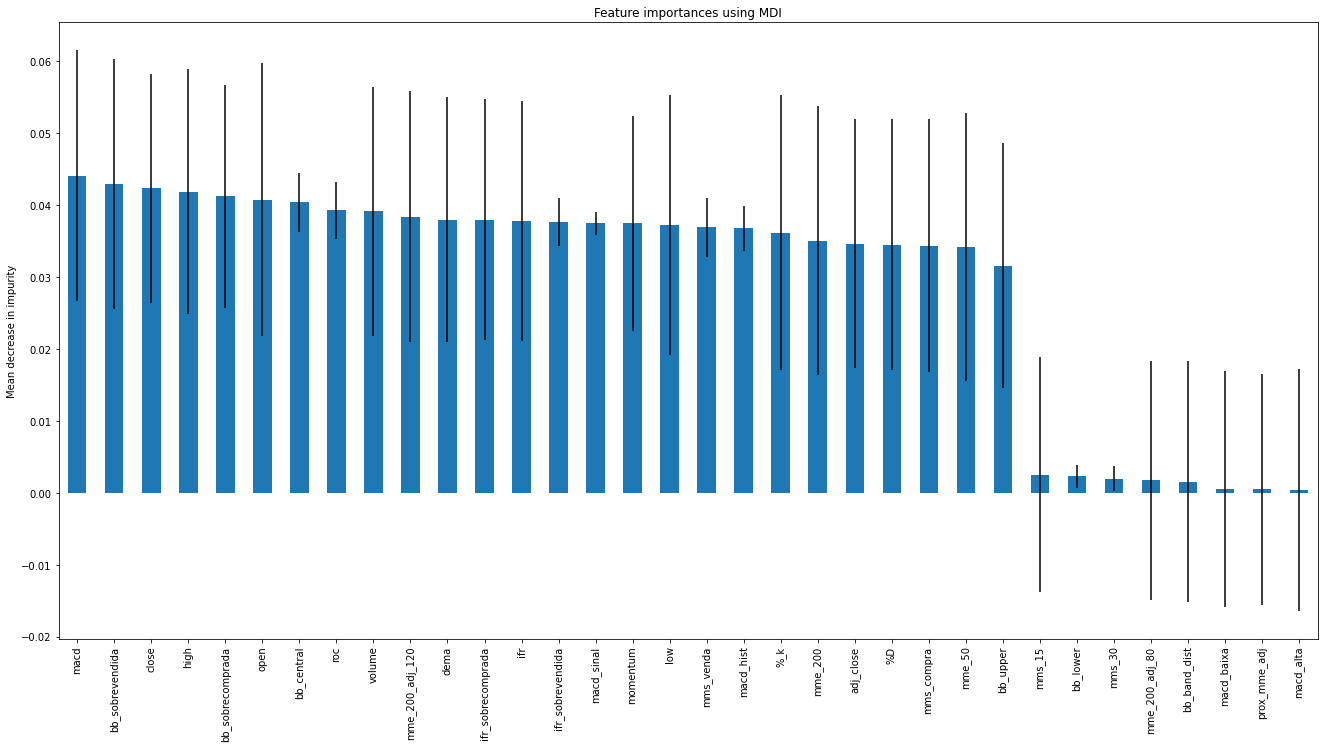

In [6]:
df_ticker3 = df_ticker3.set_index('date')

transfor = 'normal'
dir_func = np.log if transfor == 'log' else lambda x:x
inf_func = np.exp if transfor == 'log' else lambda x:x

cols_to_transform = [col for col in df_ticker3.columns if not 'target' in col]
df_ticker3[cols_to_transform] = dir_func(df_ticker3[cols_to_transform])

X = df_ticker3.drop(columns = 'target')
y = df_ticker3['target']
feature_names = X.columns

st_feat = MinMaxScaler()
X = X.sort_index(axis = 1)
X = st_feat.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = RandomForestClassifier(n_estimators=400, min_samples_leaf=2, 
                                    oob_score=True, bootstrap=True, n_jobs=4)
model.fit(X_train, y_train)

start_time = time.time()
explainer_rf = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(explainer_rf, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [53]:
rfe = RFECV(model,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)
selected_features = np.array(feature_names)[rfe.get_support()]
print([i for i in feature_names if i not in selected_features])


['mms_30', 'prox_mme_adj', 'bb_band_dist', 'macd_alta', 'macd_baixa']


In [54]:
selected_features

array(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'mms_15',
       'mms_compra', 'mms_venda', 'mme_50', 'mme_200', 'mme_200_adj_120',
       'mme_200_adj_80', 'bb_upper', 'bb_central', 'bb_lower',
       'bb_sobrecomprada', 'bb_sobrevendida', 'ifr', 'ifr_sobrecomprada',
       'ifr_sobrevendida', 'macd', 'macd_sinal', 'macd_hist', '%_k', '%D',
       'dema', 'momentum', 'roc'], dtype=object)

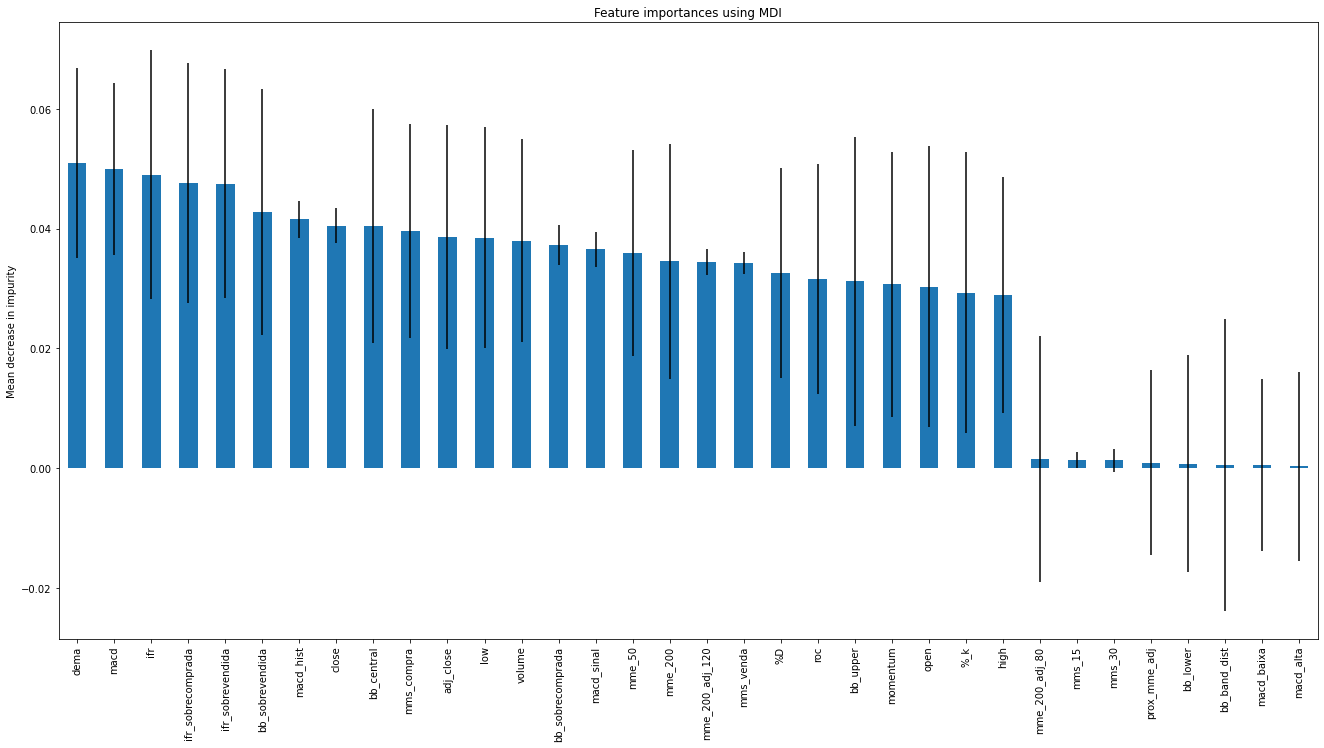

In [57]:
df_ticker7 = df_ticker7.set_index('date')

transfor = 'normal'
dir_func = np.log if transfor == 'log' else lambda x:x
inf_func = np.exp if transfor == 'log' else lambda x:x

cols_to_transform = [col for col in df_ticker7.columns if not 'target' in col]
df_ticker7[cols_to_transform] = dir_func(df_ticker7[cols_to_transform])

X = df_ticker7.drop(columns = 'target')
y = df_ticker7['target']
feature_names = X.columns

st_feat = MinMaxScaler()
X = X.sort_index(axis = 1)
X = st_feat.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = RandomForestClassifier(n_estimators=400, min_samples_leaf=2, 
                                    oob_score=True, bootstrap=True, n_jobs=4)
model.fit(X_train, y_train)

start_time = time.time()
explainer_rf = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(explainer_rf, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [58]:
rfe = RFECV(model,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)
selected_features = np.array(feature_names)[rfe.get_support()]
print([i for i in feature_names if i not in selected_features])

['open', 'high', 'close', 'volume', 'mms_15', 'mms_30', 'mms_compra', 'mme_50', 'mme_200', 'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_upper', 'bb_central', 'bb_lower', 'bb_band_dist', 'bb_sobrecomprada', 'macd_sinal', 'macd_alta', 'macd_baixa', '%_k', '%D', 'momentum', 'roc']


In [59]:
selected_features

array(['low', 'adj_close', 'mms_venda', 'bb_sobrevendida', 'ifr',
       'ifr_sobrecomprada', 'ifr_sobrevendida', 'macd', 'macd_hist',
       'dema'], dtype=object)

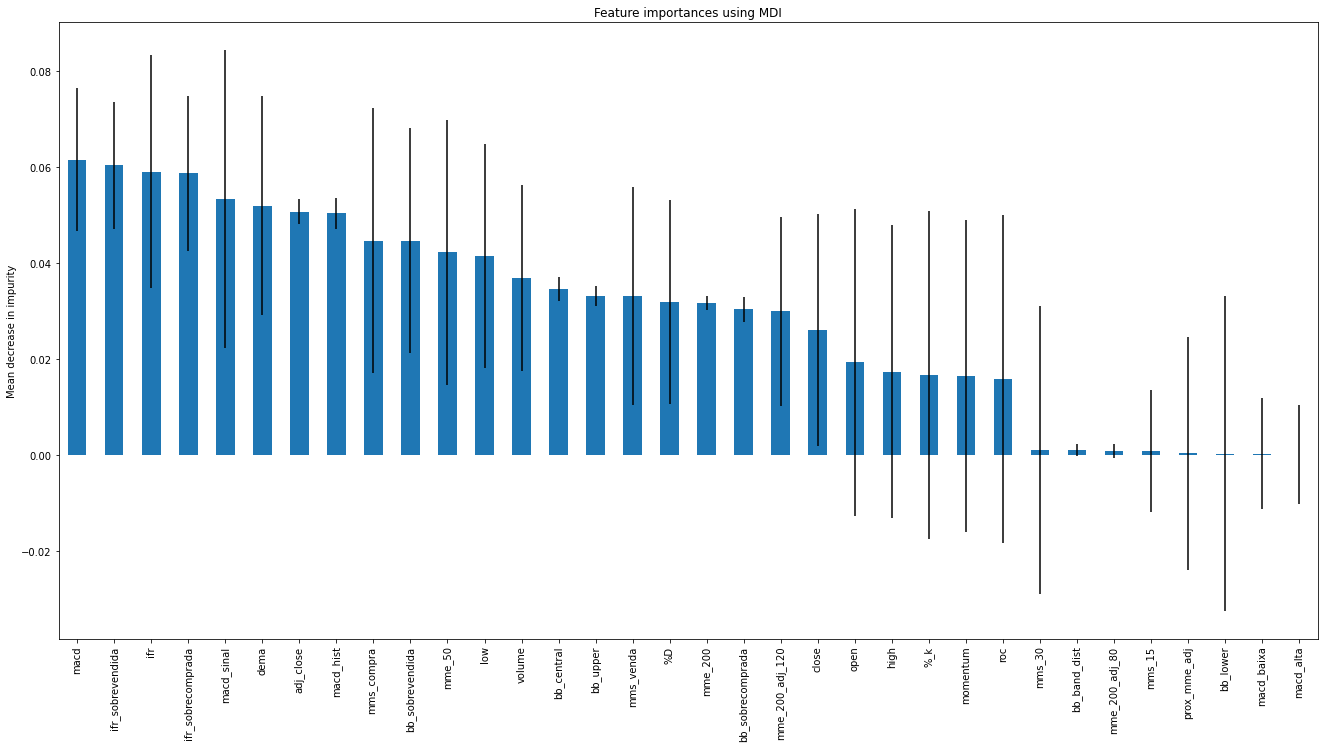

In [60]:
df_ticker15 = df_ticker15.set_index('date')

transfor = 'normal'
dir_func = np.log if transfor == 'log' else lambda x:x
inf_func = np.exp if transfor == 'log' else lambda x:x

cols_to_transform = [col for col in df_ticker15.columns if not 'target' in col]
df_ticker15[cols_to_transform] = dir_func(df_ticker15[cols_to_transform])

X = df_ticker15.drop(columns = 'target')
y = df_ticker15['target']
feature_names = X.columns

st_feat = MinMaxScaler()
X = X.sort_index(axis = 1)
X = st_feat.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = RandomForestClassifier(n_estimators=400, min_samples_leaf=2, 
                                    oob_score=True, bootstrap=True, n_jobs=4)
model.fit(X_train, y_train)

start_time = time.time()
explainer_rf = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(explainer_rf, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [61]:
rfe = RFECV(model,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)
selected_features = np.array(feature_names)[rfe.get_support()]
print([i for i in feature_names if i not in selected_features])

['open', 'high', 'close', 'volume', 'mms_15', 'mms_30', 'mms_venda', 'mme_200', 'mme_200_adj_120', 'mme_200_adj_80', 'prox_mme_adj', 'bb_lower', 'bb_band_dist', 'bb_sobrecomprada', 'macd_alta', 'macd_baixa', '%_k', '%D', 'momentum', 'roc']


In [62]:
selected_features

array(['low', 'adj_close', 'mms_compra', 'mme_50', 'bb_upper',
       'bb_central', 'bb_sobrevendida', 'ifr', 'ifr_sobrecomprada',
       'ifr_sobrevendida', 'macd', 'macd_sinal', 'macd_hist', 'dema'],
      dtype=object)

In [63]:
explainer_shap = shap.Explainer(model.predict, X_test)
shap_values = explainer_shap(X_test)

print_feature_importances_shap_values(shap_values, feature_names)

Permutation explainer: 473it [06:40,  1.15it/s]                         

macd_sinal -> 0.0844 (softmax = 0.0313)
ifr_sobrecomprada -> 0.0647 (softmax = 0.0307)
ifr -> 0.0636 (softmax = 0.0306)
ifr_sobrevendida -> 0.0631 (softmax = 0.0306)
adj_close -> 0.0469 (softmax = 0.0301)
macd -> 0.0398 (softmax = 0.0299)
mme_50 -> 0.0355 (softmax = 0.0298)
dema -> 0.0344 (softmax = 0.0297)
bb_sobrevendida -> 0.0321 (softmax = 0.0297)
mms_compra -> 0.0320 (softmax = 0.0297)
mme_200 -> 0.0294 (softmax = 0.0296)
bb_upper -> 0.0291 (softmax = 0.0296)
low -> 0.0281 (softmax = 0.0296)
%D -> 0.0272 (softmax = 0.0295)
macd_hist -> 0.0259 (softmax = 0.0295)
mms_venda -> 0.0251 (softmax = 0.0295)
bb_central -> 0.0211 (softmax = 0.0293)
volume -> 0.0183 (softmax = 0.0293)
mme_200_adj_120 -> 0.0164 (softmax = 0.0292)
bb_sobrecomprada -> 0.0151 (softmax = 0.0292)
close -> 0.0136 (softmax = 0.0291)
high -> 0.0089 (softmax = 0.0290)
open -> 0.0086 (softmax = 0.0290)
%_k -> 0.0068 (softmax = 0.0289)
momentum -> 0.0067 (softmax = 0.0289)
roc -> 0.0062 (softmax = 0.0289)
mme_200_adj_80

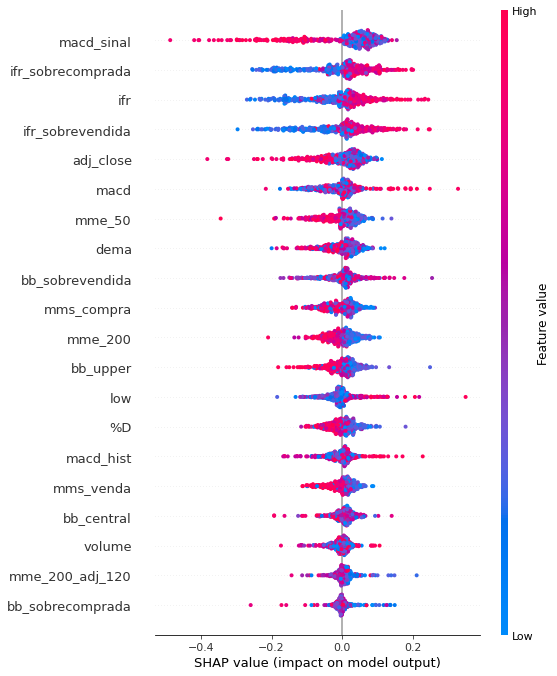

In [64]:
shap.summary_plot(shap_values, feature_names = feature_names)